# Pandas Workout Questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

1. How to create new columns derived from existing columns in
Pandas?


In [2]:
data =({"A":[420,380,390],
        "B":[50,40,45]})
df = pd.DataFrame(data)
df

,A,B
0,420,50
1,380,40
2,390,45


In [3]:
df["A * B"] = df["A"] * df["B"]
df["A / B"] = df["A"] / df["B"]
df["A + B"] = df["A"] + df["B"]
df["A - B"] = df["A"] - df["B"]
df["A % B"] = df["A"] % df["B"]
df

,A,B,A * B,A / B,A + B,A - B,A % B
0,420,50,21000,8.400000,470,370,20
1,380,40,15200,9.500000,420,340,20
2,390,45,17550,8.666667,435,345,30


In [4]:
'''def add(x,y):
    return x + y

df["A + B"] = df.apply(add,)'''

'def add(x,y):\n    return x + y\n\ndf["A + B"] = df.apply(add,)'

2. Define the different ways a DataFrame can be created in
pandas?

In [29]:
# Using dict and list, {[],[],[]}
data = {
    'Country':['Italy','Spain','Greece','France','Portugal'],
    'Population':[61,46,11,65,10],
    'Percetage':[0.83,0.63,0.15,0.88,0.14]
}

df = pd.DataFrame(data)
df

,Country,Population,Percetage
0,Italy,61,0.83
1,Spain,46,0.63
2,Greece,11,0.15
3,France,65,0.88
4,Portugal,10,0.14


In [6]:
# Using list and tuple, [(),(),()]
data = [('Italy',61,0.83),
        ('Spain',46,0.63),
        ('Greece',11,0.15),
        ('France',65,0.88),
        ('Portugal',10,0.14)]
df = pd.DataFrame(data, columns=['Country','Population','Percentage'])
df

,Country,Population,Percentage
0,Italy,61,0.83
1,Spain,46,0.63
2,Greece,11,0.15
3,France,65,0.88
4,Portugal,10,0.14


In [7]:
# Using list and dict,[{},{},{}]

data = [{'Country':'Italy','Population':61,'Percentage':0.83},
        {'Country':'Spain','Population':46,'Percentage':0.63},
        {'Country':'Greece','Population':11,'Percentage':0.15},
        {'Country':'France','Population':65,'Percentage':0.88},
        {'Country':'Portugal','Population':10,'Percentage':0.14}
        ]
df = pd.DataFrame(data)
df

,Country,Population,Percentage
0,Italy,61,0.83
1,Spain,46,0.63
2,Greece,11,0.15
3,France,65,0.88
4,Portugal,10,0.14


3. How will you create a series from dict in Pandas?

In [8]:
var = {'X':0,'Y':1,'Z':2}
print('Before dictionary to series')
print(type(var))
var_s = pd.Series(var)
print('After the convertion')
print(type(var_s))


Before dictionary to series
<class 'dict'>
After the convertion
<class 'pandas.core.series.Series'>


4. How can we create a copy of the series in Pandas?

In [9]:
copy_varF = var_s.copy(deep=False)
copy_varT = var_s.copy(deep=True)
print('copy where deep=False =',copy_varF)
print('copy where deep=True =',copy_varT)

copy where deep=False = X    0
Y    1
Z    2
dtype: int64
copy where deep=True = X    0
Y    1
Z    2
dtype: int64


5. How will you create an empty DataFrame in Pandas?

In [10]:
empty = pd.DataFrame()
type(empty)

pandas.core.frame.DataFrame

6. How will you add a column to a pandas DataFrame?

In [11]:
# creating using dictionary and series
data = {
     'One':pd.Series([1,2,3,4,5],index=['a','b','c','d','e']),
    'Two':pd.Series([1,2,3,4,5,6],index=['a','b','c','d','e','f'])
}
df = pd.DataFrame(data)

print('Before converting')
print(data)
print(type(data))
print('\n')
print('After converting')
print(df)
print(type(df))

Before converting
{'One': a    1
b    2
c    3
d    4
e    5
dtype: int64, 'Two': a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64}
<class 'dict'>


After converting
   One  Two
a  1.0    1
b  2.0    2
c  3.0    3
d  4.0    4
e  5.0    5
f  NaN    6
<class 'pandas.core.frame.DataFrame'>


In [12]:
# adding new column to created data frame
df['Three'] = pd.Series([20,40,60],index=['a','b','c'])
df

,One,Two,Three
a,1.0,1,20.0
b,2.0,2,40.0
c,3.0,3,60.0
d,4.0,4,NaN
e,5.0,5,NaN
f,NaN,6,NaN


In [13]:
# adding new column to data frame using exisiting columns
df['Four'] = df['One'] + df['Three']
df


,One,Two,Three,Four
a,1.0,1,20.0,21.0
b,2.0,2,40.0,42.0
c,3.0,3,60.0,63.0
d,4.0,4,NaN,NaN
e,5.0,5,NaN,NaN
f,NaN,6,NaN,NaN


7. How to get the items of series A not present in series B?

In [14]:
# removing items present in p2 from p1 using isin() method.

p1 = pd.Series([2,4,6,7,8,10])
p2 = pd.Series([8,10,12,14,16])
print('Before removing')
print([x for x in p1])
print([x for x in p2])
print('After removing')
a = p1[~p1.isin(p2)]
print(a)


Before removing
[2, 4, 6, 7, 8, 10]
[8, 10, 12, 14, 16]
After removing
0    2
1    4
2    6
3    7
dtype: int64


In [15]:
print('Before removing')
print([x for x in p1])
print([x for x in p2])
print('\n')
a = p2[~p2.isin(p1)]
print('After removing')
print(a)


Before removing
[2, 4, 6, 7, 8, 10]
[8, 10, 12, 14, 16]


After removing
2    12
3    14
4    16
dtype: int64


8. How to get the items not common to both series A and series
B?

In [16]:
p1 = pd.Series([2,4,6,7,8,10])
p2 = pd.Series([8,10,12,14,16])

a = p1[~p1.isin(p2)]
print([x for x in a])
print('')

pu = pd.Series(np.union1d(p1,p2))
pi = pd.Series(np.intersect1d(p1,p2))
print([x for x in pu])
print([x for x in pi])
print('')

b = pu[~pu.isin(pi)]
print([x for x in b])

[2, 4, 6, 7]

[2, 4, 6, 7, 8, 10, 12, 14, 16]
[8, 10]

[2, 4, 6, 7, 12, 14, 16]


9. How to get the minimum, 25th percentile, median, 75th, and
max of a numeric series?

  Percentile      value
0        0th   4.614987
1       25th  12.155728
2       50th  14.677808
3       75th  17.580541
4      100th  33.249755


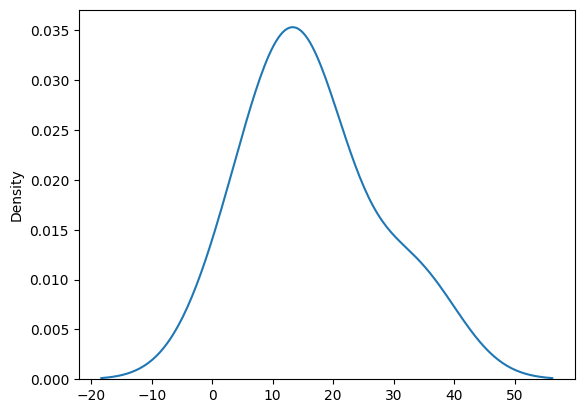

In [17]:
# p = pd.Series(np.random.normal(14,6,22))
state = np.random.RandomState(120)
p = pd.Series(state.normal(14,6,22))
p = np.percentile(p,q=[0,25,50,75,100])
# print('0th percentile = {}\n 25th percentile = {}\n 50th percentile = {}\n 75th percentile = {}\n 100th percentile = {}'.format(p[0],p[1],p[2],p[3],p[4]))
data = {
    'Percentile':['0th','25th','50th','75th','100th'],
    'value':[p[0],p[1],p[2],p[3],p[4]]
}

df = pd.DataFrame(data)
print(df)
sns.kdeplot(p)
plt.show()

10. How to get frequency counts of unique items of a series?

In [18]:

# p = pd.Series(np.take(list('pqrstu'),np.random.randint(6,size=17)))
# print([ x for x in p])
p = pd.Series(np.take(list('pqrstu'),np.random.randint(6,size=17)))
print([ x for x in p])
p.value_counts()


['u', 't', 'q', 'u', 's', 's', 'u', 'p', 'p', 'r', 'p', 'p', 's', 'q', 'u', 'p', 'r']


p    5
u    4
s    3
q    2
r    2
t    1
dtype: int64

11. How to convert a numpy array to a dataframe of given shape?

In [19]:
p = pd.Series(np.random.randint(1,7,35))
print([x for x in p])
info = pd.DataFrame(p.values.reshape(7,5))
print(info)


[5, 1, 1, 1, 4, 1, 2, 1, 1, 1, 3, 3, 5, 5, 6, 3, 5, 1, 2, 5, 5, 5, 5, 4, 5, 6, 3, 6, 3, 6, 1, 6, 5, 4, 3]
   0  1  2  3  4
0  5  1  1  1  4
1  1  2  1  1  1
2  3  3  5  5  6
3  3  5  1  2  5
4  5  5  5  4  5
5  6  3  6  3  6
6  1  6  5  4  3


12.How can we convert a Series to DataFrame?

In [20]:
s = pd.Series([1,2,3,4,5,6])
print([ x for x in s])
print(type(s))
t = type(s)

d = s.to_frame()
print(d)
print(type(d))

[1, 2, 3, 4, 5, 6]
<class 'pandas.core.series.Series'>
   0
0  1
1  2
2  3
3  4
4  5
5  6
<class 'pandas.core.frame.DataFrame'>


13. How can we sort the DataFrame?

- by lable
- by actual value

.T is used to Transpose the data frame

In [21]:
df = pd.DataFrame([8,2,6,4,1,9,0,7,3,10,5])
df.T

,0,1,2,3,4,5,6,7,8,9,10
0,8,2,6,4,1,9,0,7,3,10,5


In [22]:
import pandas as pd


data = {
    'label': ['A', 'B', 'A', 'B', 'C', 'A'],
    'value': [10, 5, 8, 12, 7, 3]
}

df = pd.DataFrame(data)

# Sort by label and then by value
l = df.sort_values(by=['label'])
v = df.sort_values(by=['value'])
sorted_df = df.sort_values(by=['label', 'value'])

print('sorted by just by label',l)
print('')
print('sorted by just by value',v)
print('')
print('sorted by both label & value',sorted_df)


sorted by just by label   label  value
0     A     10
2     A      8
5     A      3
1     B      5
3     B     12
4     C      7

sorted by just by value   label  value
5     A      3
1     B      5
4     C      7
2     A      8
0     A     10
3     B     12

sorted by both label & value   label  value
5     A      3
2     A      8
0     A     10
1     B      5
3     B     12
4     C      7


15. What is Time Series in Pandas?

In [23]:
# converting string date to date time

from datetime import datetime

d_str1 = "Wednesday,July,14,2018"
d_str2 = '14/7/17'
d_str3 = '14-07-2017'

dt_str1 = datetime.strptime(d_str1,'%A,%B,%d,%Y')
dt_str2 = datetime.strptime(d_str2,'%d/%m/%y')
dt_str3 = datetime.strptime(d_str3,'%d-%m-%Y')

print(dt_str1)
print(dt_str2)
print(dt_str3)

2018-07-14 00:00:00
2017-07-14 00:00:00
2017-07-14 00:00:00


13. What is Data Aggregation?

In [24]:
df = pd.DataFrame({'A':[1,2,3,4],
                   'B':[5,6,7,8]}
                   )
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [25]:
df.agg(['sum','min','max'])

,A,B
sum,10,26
min,1,5
max,4,8


In [26]:
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,6.500000
std,1.290994,1.290994
min,1.000000,5.000000
25%,1.750000,5.750000
50%,2.500000,6.500000
75%,3.250000,7.250000
max,4.000000,8.000000


16.  Row and Column selection

In [27]:
pwd = os.getcwd()

In [30]:
data = pd.read_csv(pwd+'/california_housing_test.csv')
df = data.copy()
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [31]:
# row selection

In [32]:
df['longitude'].head(5)

0   -122.05
1   -118.30
2   -117.81
3   -118.36
4   -119.67
Name: longitude, dtype: float64

In [33]:
df.longitude.head(5)

0   -122.05
1   -118.30
2   -117.81
3   -118.36
4   -119.67
Name: longitude, dtype: float64

In [34]:
df[['longitude']].head(5)

,longitude
0,-122.05
1,-118.30
2,-117.81
3,-118.36
4,-119.67


In [41]:
# column selection

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [37]:
df[['total_rooms','total_rooms','total_bedrooms']].head(5)

,total_rooms,total_rooms,total_bedrooms
0,3885.0,3885.0,661.0
1,1510.0,1510.0,310.0
2,3589.0,3589.0,507.0
3,67.0,67.0,15.0
4,1241.0,1241.0,244.0


In [38]:
columns = ['housing_median_age','total_bedrooms','households']
df[columns].head()

,housing_median_age,total_bedrooms,households
0,27.0,661.0,606.0
1,43.0,310.0,277.0
2,27.0,507.0,495.0
3,28.0,15.0,11.0
4,19.0,244.0,237.0


In [39]:
# Using loc

df.loc[:, ['total_bedrooms', 'housing_median_age']].head()

,total_bedrooms,housing_median_age
0,661.0,27.0
1,310.0,43.0
2,507.0,27.0
3,15.0,28.0
4,244.0,19.0


In [40]:
# Using iloc to select columns by integer location ( the index may change as we alter the data frame )
df.iloc[:, [2,6]].head()

,housing_median_age,households
0,27.0,606.0
1,43.0,277.0
2,27.0,495.0
3,28.0,11.0
4,19.0,237.0


15. Filter Data

In [46]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [95]:
df[(df.housing_median_age) >= 25].sort_values(by='housing_median_age',ascending=True).head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
865,-117.70,33.60,25.0,1321.0,295.0,396.0,278.0,3.1131,77100.0
199,-121.02,37.68,25.0,3262.0,588.0,1834.0,578.0,3.9960,114500.0
2243,-122.03,37.27,25.0,4460.0,553.0,1608.0,561.0,10.7958,500001.0
2762,-122.44,38.34,25.0,3106.0,715.0,1262.0,665.0,1.9487,233500.0
2439,-117.94,33.62,25.0,1188.0,264.0,569.0,249.0,3.6607,500001.0


In [75]:
df[(df.housing_median_age > 25) & (df.housing_median_age < 30)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
14,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121,222500.0
17,-121.20,38.69,26.0,3077.0,607.0,1603.0,595.0,2.7174,137500.0
...,...,...,...,...,...,...,...,...,...
2916,-121.92,36.95,29.0,3457.0,699.0,1327.0,563.0,3.6597,252300.0
2957,-118.23,33.91,27.0,1694.0,393.0,1890.0,373.0,3.0341,89100.0
2966,-119.75,34.50,26.0,3563.0,579.0,1479.0,575.0,5.9522,438400.0
2967,-117.94,33.94,26.0,1962.0,540.0,1236.0,520.0,2.2156,145000.0


In [98]:
# filtering null values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [104]:
df.notnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
2995,True,True,True,True,True,True,True,True,True
2996,True,True,True,True,True,True,True,True,True
2997,True,True,True,True,True,True,True,True,True
2998,True,True,True,True,True,True,True,True,True


## Group by 

In [105]:
pwd = os.getcwd()

In [117]:
data = pd.read_csv(pwd+'/learn_groupby.csv',skipinitialspace=True)
df = data.copy()

In [129]:
columns = ['Year','Trade Flow Code','Trade Flow','Reporter Code','Reporter','Partner Code','Partner','Commodity Code','Commodity','Trade Value (US$)']
df = df[columns]
df= df[df['Partner'] != 'World']
df

,Year,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Trade Value (US$)
2,2015,2,Exports,826,United Kingdom,36,Australia,401,"Milk and cream, neither concentrated nor sweet...",50331
3,2015,2,Exports,826,United Kingdom,40,Austria,401,"Milk and cream, neither concentrated nor sweet...",360
4,2015,1,Imports,826,United Kingdom,56,Belgium,401,"Milk and cream, neither concentrated nor sweet...",1424271
5,2015,2,Exports,826,United Kingdom,56,Belgium,401,"Milk and cream, neither concentrated nor sweet...",996031
6,2015,2,Exports,826,United Kingdom,100,Bulgaria,401,"Milk and cream, neither concentrated nor sweet...",191
...,...,...,...,...,...,...,...,...,...,...
632,2015,2,Exports,826,United Kingdom,752,Sweden,402,"Milk and cream, concentrated or sweetened",569
633,2015,2,Exports,826,United Kingdom,757,Switzerland,402,"Milk and cream, concentrated or sweetened",16713
634,2015,2,Exports,826,United Kingdom,784,United Arab Emirates,402,"Milk and cream, concentrated or sweetened",338823
635,2015,2,Exports,826,United Kingdom,792,Turkey,402,"Milk and cream, concentrated or sweetened",37883


In [130]:
df.groupby('Trade Flow')['Trade Value (US$)'].sum()

Trade Flow
Exports    265029661
Imports    156483978
Name: Trade Value (US$), dtype: int64

In [131]:
df.groupby('Commodity')['Trade Value (US$)'].sum()

Commodity
Milk and cream, concentrated or sweetened             220039823
Milk and cream, neither concentrated nor sweetened    201473816
Name: Trade Value (US$), dtype: int64